<a href="https://colab.research.google.com/github/devillarry/Data-analysis-and-Machine-Learning/blob/master/CURRENCY_PAIR_TRADING_SCRIPT_SAMKILSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
!pip install fxcmpy
import fxcmpy

In [0]:
TOKEN = 'd973b6b4f7e87dcdcf0aa9ee767dd73a0d03be8b'

In [0]:
con = fxcmpy.fxcmpy(access_token=TOKEN, log_level='error')

In [88]:
print(con.get_instruments())

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'USD/CNH', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'EMBasket', 'JPYBasket', 'BTC/USD', 'BCH/USD', 'ETH/USD', 'LTC/USD', 'XRP/USD', 'CryptoMajor', 'ESPORTS', 'BIOTECH', 'CANNABIS', 'FAANG', 'CHN.TECH', 'CHN.ECOMM', 'USEquities']


In [0]:
start = '2017-01-01' 
end = '2018-01-01'
symbols = ['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD']

In [90]:
symbols[0]

'EUR/USD'

In [0]:
from pandas_datareader import data 
import pandas as pd

df = pd.DataFrame()
#con.pdr_override()
#data = pdr.get_candles(symbols, start, end)['Adj Close']
for symbol in symbols:
  df[symbol] =  con.get_candles(symbol, period='D1', number=250)['bidclose']

In [92]:
df.head() #bid close wala 

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD
date,,,,,,,,
2018-12-23 22:00:00,1.13672,110.924,1.26444,0.99354,1.13056,0.70372,1.35931,0.67232
2018-12-24 22:00:00,1.13989,110.324,1.26994,0.98685,1.12697,0.70495,1.36089,0.67218
2018-12-26 22:00:00,1.13512,111.354,1.26324,0.99555,1.12991,0.70652,1.35727,0.67288
2018-12-27 22:00:00,1.14278,110.948,1.26428,0.98768,1.12897,0.70260,1.36159,0.66966
2018-12-28 22:00:00,1.14396,110.245,1.26917,0.98344,1.12547,0.70351,1.36365,0.67018


In [93]:
df.columns

Index(['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD',
       'USD/CAD', 'NZD/USD'],
      dtype='object')

Text(0.5, 1.0, 'Stocks Adj Close Price')

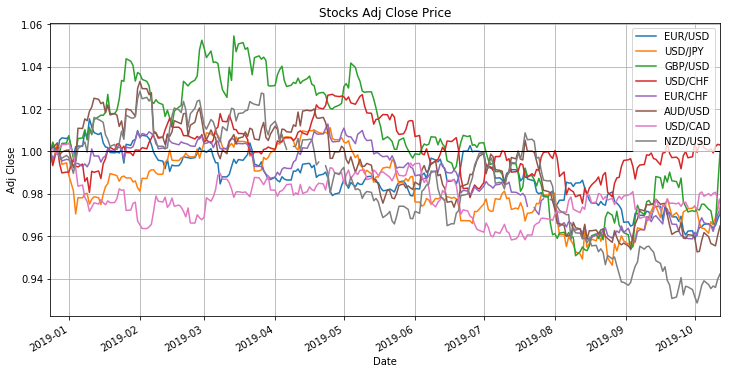

In [94]:
from matplotlib.pyplot import *
#for symbol in symbols:
    # df = pdr.get_data_yahoo(symbols, start, end)['Adj Close']
normalize_stocks = df.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
xlabel("Date")
ylabel("Adj Close")
grid()
title("Stocks Adj Close Price")
#plt.show()

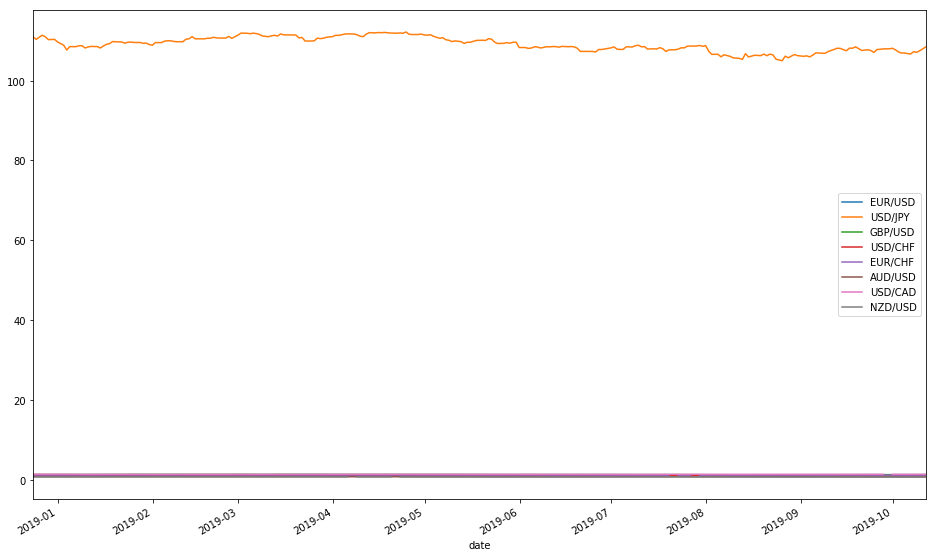

In [95]:
df.plot(figsize=(16,10))

In [96]:
corr_rest = df.corr()
corr_rest

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD
EUR/USD,1.000000,0.436446,0.648822,-0.023768,0.715341,0.833132,-0.008509,0.856516
USD/JPY,0.436446,1.000000,0.861515,0.771515,0.859822,0.725463,0.398013,0.668101
GBP/USD,0.648822,0.861515,1.000000,0.591003,0.888532,0.841838,0.250987,0.790804
USD/CHF,-0.023768,0.771515,0.591003,1.000000,0.680634,0.332310,0.480299,0.220840
EUR/CHF,0.715341,0.859822,0.888532,0.680634,1.000000,0.844958,0.327676,0.788968
AUD/USD,0.833132,0.725463,0.841838,0.332310,0.844958,1.000000,0.000586,0.934544
USD/CAD,-0.008509,0.398013,0.250987,0.480299,0.327676,0.000586,1.000000,-0.051350
NZD/USD,0.856516,0.668101,0.790804,0.220840,0.788968,0.934544,-0.051350,1.000000


In [97]:
pair_value = corr_rest.abs().unstack()
pair_value.sort_values(ascending = False)

NZD/USD  NZD/USD    1.000000
USD/CAD  USD/CAD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
EUR/CHF  EUR/CHF    1.000000
AUD/USD  AUD/USD    1.000000
EUR/USD  EUR/USD    1.000000
NZD/USD  AUD/USD    0.934544
AUD/USD  NZD/USD    0.934544
GBP/USD  EUR/CHF    0.888532
EUR/CHF  GBP/USD    0.888532
USD/JPY  GBP/USD    0.861515
GBP/USD  USD/JPY    0.861515
EUR/CHF  USD/JPY    0.859822
USD/JPY  EUR/CHF    0.859822
EUR/USD  NZD/USD    0.856516
NZD/USD  EUR/USD    0.856516
AUD/USD  EUR/CHF    0.844958
EUR/CHF  AUD/USD    0.844958
GBP/USD  AUD/USD    0.841838
AUD/USD  GBP/USD    0.841838
EUR/USD  AUD/USD    0.833132
AUD/USD  EUR/USD    0.833132
NZD/USD  GBP/USD    0.790804
GBP/USD  NZD/USD    0.790804
EUR/CHF  NZD/USD    0.788968
NZD/USD  EUR/CHF    0.788968
USD/CHF  USD/JPY    0.771515
USD/JPY  USD/CHF    0.771515
                      ...   
USD/CHF  EUR/CHF    0.680634
EUR/CHF  USD/CHF    0.680634
USD/JPY  NZD/USD    0.668101
NZD/USD  USD/J

In [98]:
corr_rest['EUR/USD'].sort_values(ascending=False)

EUR/USD    1.000000
NZD/USD    0.856516
AUD/USD    0.833132
EUR/CHF    0.715341
GBP/USD    0.648822
USD/JPY    0.436446
USD/CAD   -0.008509
USD/CHF   -0.023768
Name: EUR/USD, dtype: float64

In [99]:
corr_rest['NZD/USD'].sort_values(ascending=False)

NZD/USD    1.000000
AUD/USD    0.934544
EUR/USD    0.856516
GBP/USD    0.790804
EUR/CHF    0.788968
USD/JPY    0.668101
USD/CHF    0.220840
USD/CAD   -0.051350
Name: NZD/USD, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cb4221470>,
      dtype=object)

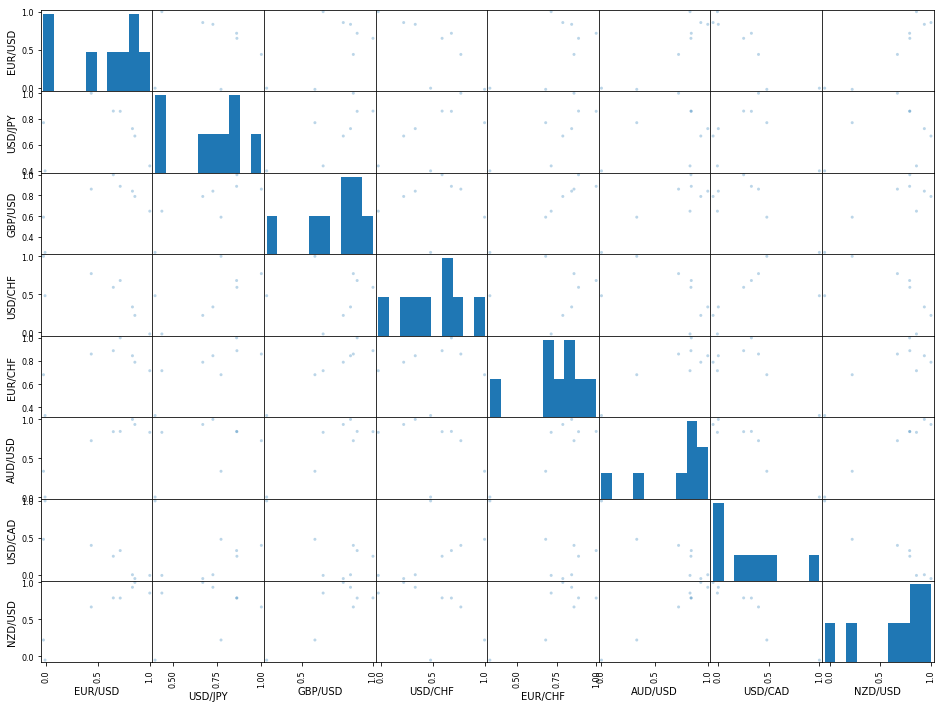

In [100]:
from pandas.plotting import scatter_matrix

scatter_matrix(corr_rest, figsize=(16,12), alpha=0.3)

In [101]:
# Returns
for symbol in symbols:
    returns = df.pct_change()
returns.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD
date,,,,,,,,
2018-12-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-12-24 22:00:00,0.002789,-0.005409,0.004350,-0.006733,-0.003175,0.001748,0.001162,-0.000208
2018-12-26 22:00:00,-0.004185,0.009336,-0.005276,0.008816,0.002609,0.002227,-0.002660,0.001041
2018-12-27 22:00:00,0.006748,-0.003646,0.000823,-0.007905,-0.000832,-0.005548,0.003183,-0.004785
2018-12-28 22:00:00,0.001033,-0.006336,0.003868,-0.004293,-0.003100,0.001295,0.001513,0.000777


In [0]:
returns = returns.dropna()

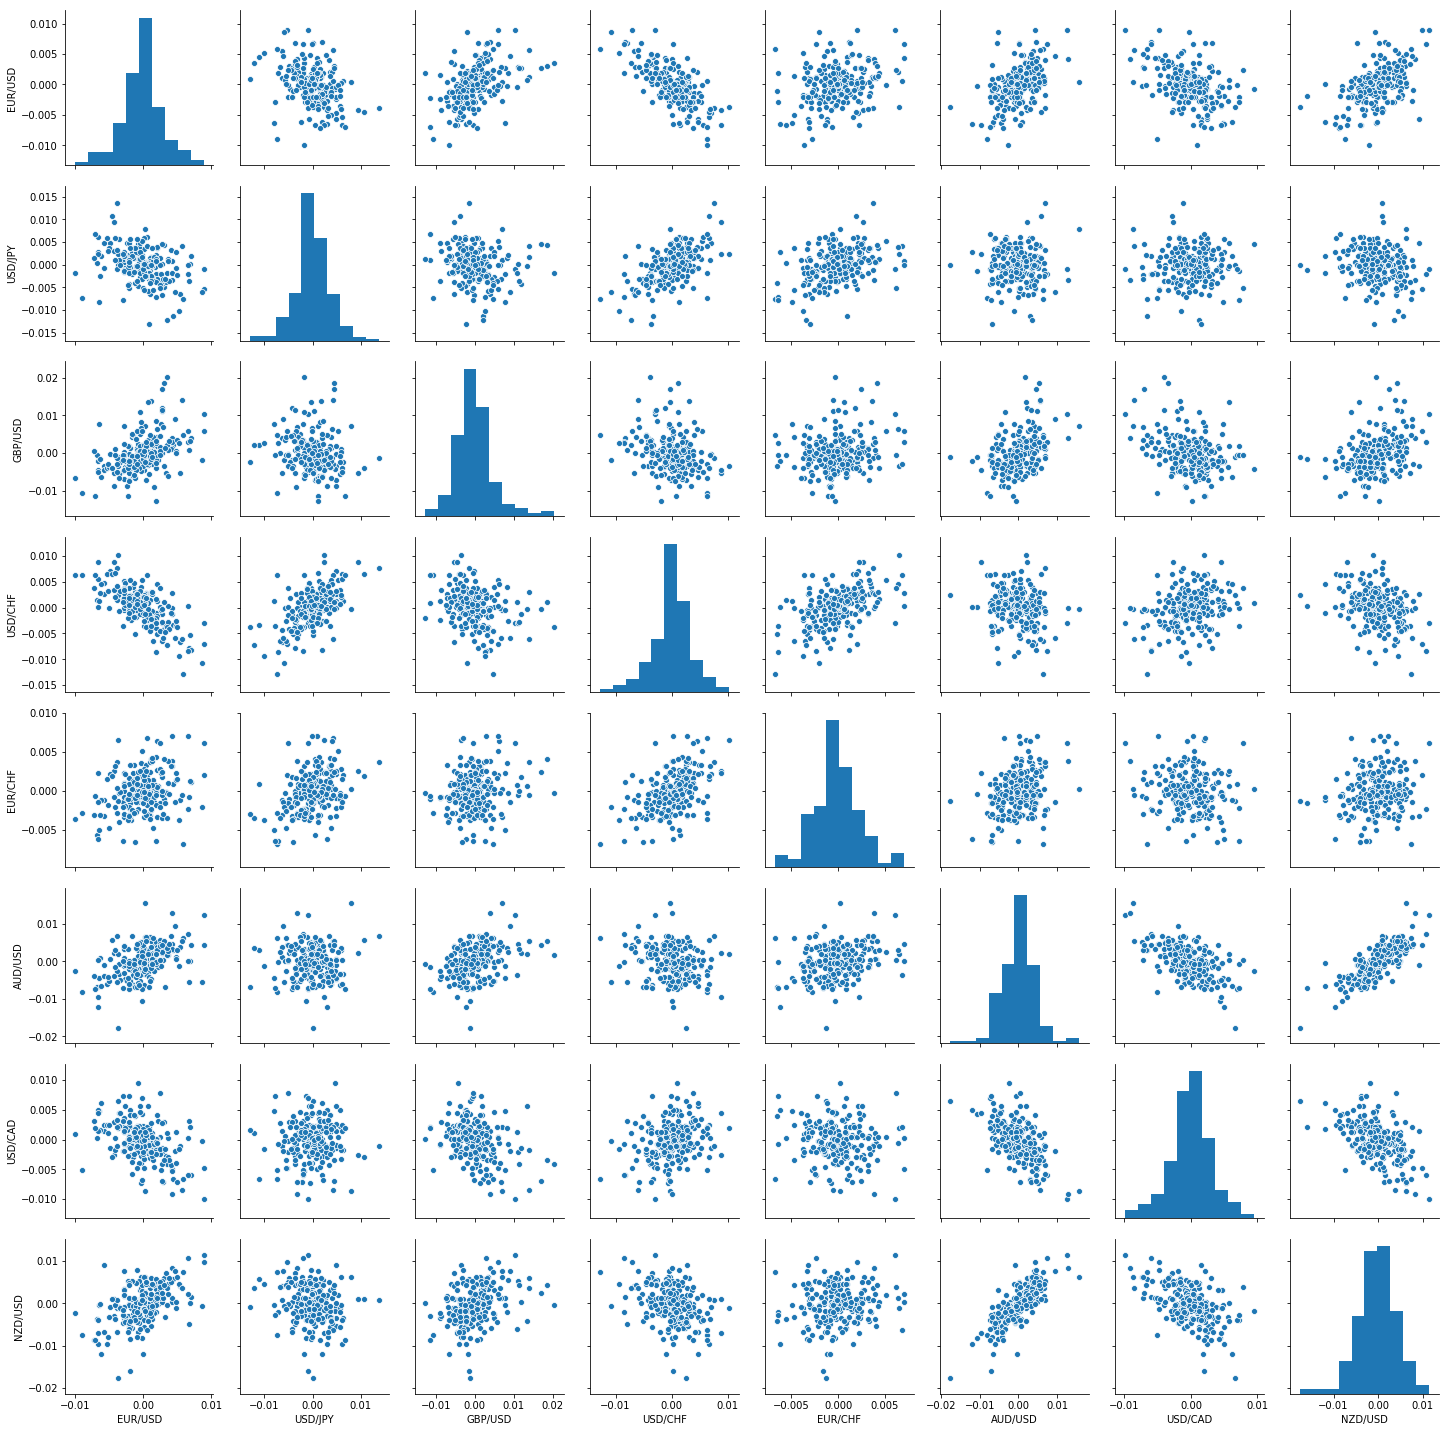

In [103]:
import seaborn as sns
sns.pairplot(returns[1:])

In [104]:
# Worst Single Day Returns
returns.idxmin()

EUR/USD   2019-03-07 22:00:00
USD/JPY   2019-08-01 21:00:00
GBP/USD   2019-07-29 21:00:00
USD/CHF   2019-06-20 21:00:00
EUR/CHF   2019-06-20 21:00:00
AUD/USD   2019-02-06 22:00:00
USD/CAD   2019-01-25 22:00:00
NZD/USD   2019-02-06 22:00:00
dtype: datetime64[ns]

In [105]:

# Best Single Day Gain
returns.idxmax()

EUR/USD   2019-01-25 22:00:00
USD/JPY   2019-08-13 21:00:00
GBP/USD   2019-03-13 21:00:00
USD/CHF   2019-01-10 22:00:00
EUR/CHF   2019-02-12 22:00:00
AUD/USD   2019-01-04 22:00:00
USD/CAD   2019-03-01 22:00:00
NZD/USD   2019-01-25 22:00:00
dtype: datetime64[ns]

In [106]:
returns.std()

EUR/USD    0.002999
USD/JPY    0.003557
GBP/USD    0.004775
USD/CHF    0.003419
EUR/CHF    0.002456
AUD/USD    0.004150
USD/CAD    0.003100
NZD/USD    0.004283
dtype: float64

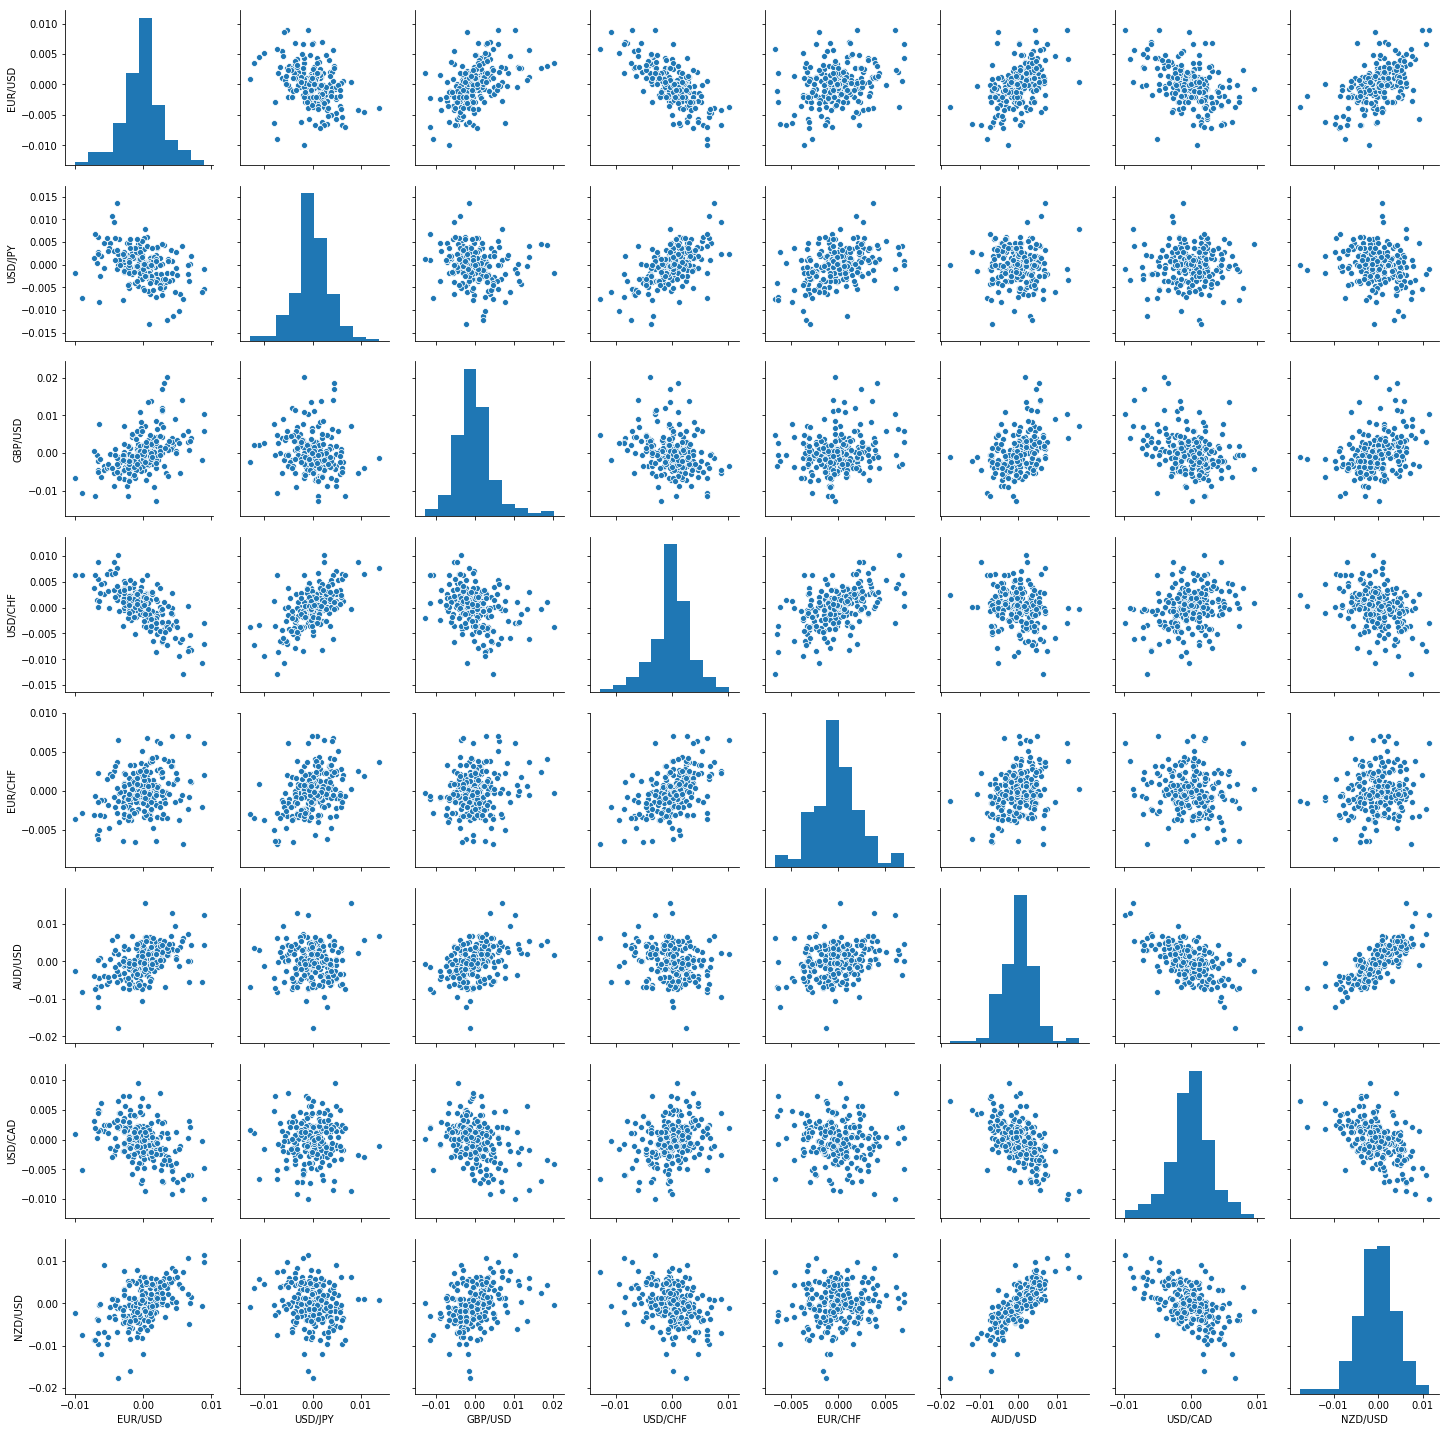

In [107]:
sns.pairplot(returns.dropna())

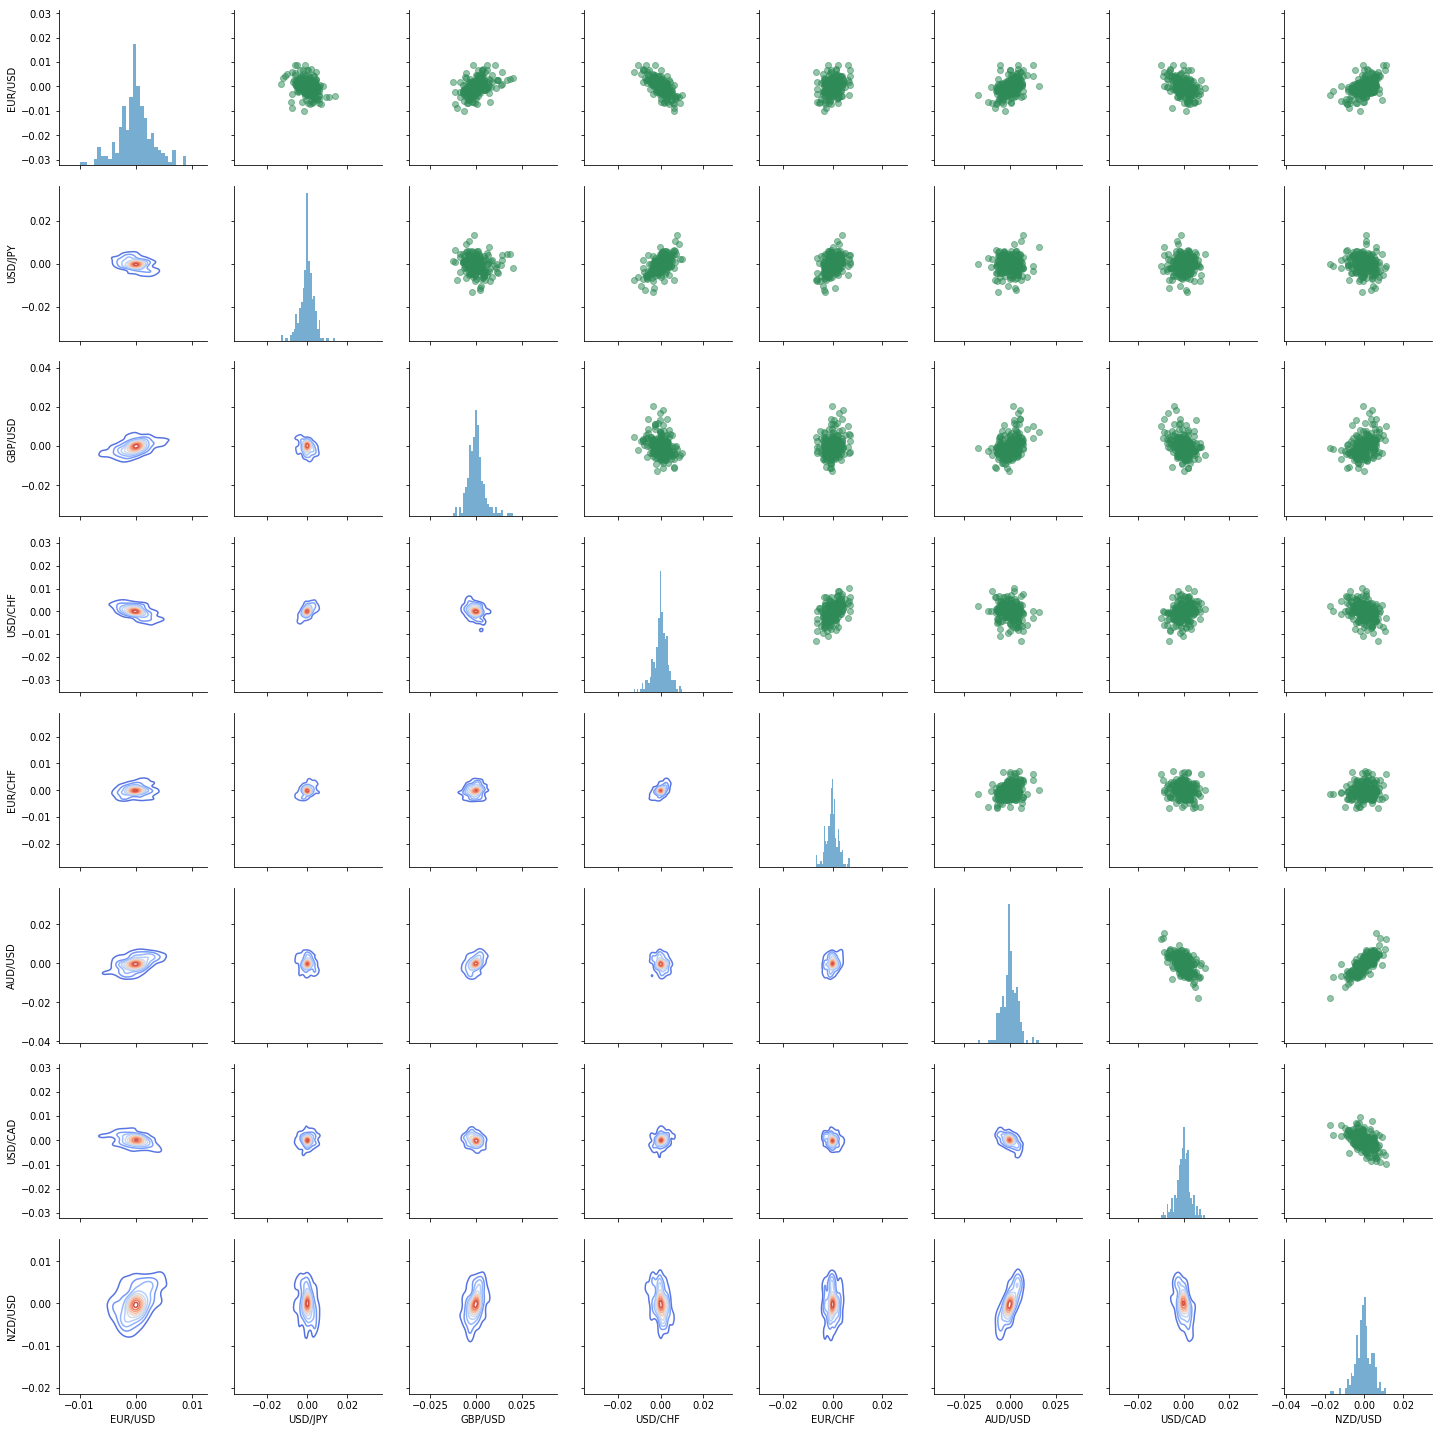

In [108]:
import matplotlib.pyplot as plt
returns_fig = sns.PairGrid(returns.dropna())

# Using map_upper to specify upper triangle scatter plots.
returns_fig.map_upper(plt.scatter,color='seagreen',alpha=0.5)

# Using lower triangle for kde plot
returns_fig.map_lower(sns.kdeplot,cmap='coolwarm')

# diagonal will be a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30, alpha=0.6)

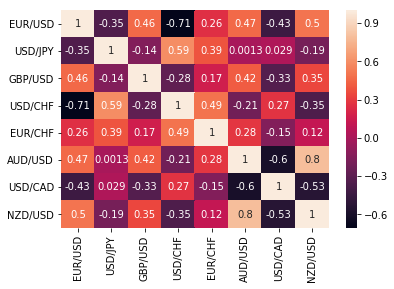

In [109]:
sns.heatmap(returns.corr(),annot=True)

In [110]:
rest_rets = returns.corr()
rest_rets

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD
EUR/USD,1.000000,-0.348854,0.460593,-0.705327,0.255956,0.466359,-0.425877,0.504063
USD/JPY,-0.348854,1.000000,-0.144404,0.594436,0.390037,0.001294,0.028795,-0.189029
GBP/USD,0.460593,-0.144404,1.000000,-0.283407,0.171897,0.415340,-0.329484,0.346604
USD/CHF,-0.705327,0.594436,-0.283407,1.000000,0.493951,-0.205797,0.273691,-0.353470
EUR/CHF,0.255956,0.390037,0.171897,0.493951,1.000000,0.283585,-0.145385,0.115121
AUD/USD,0.466359,0.001294,0.415340,-0.205797,0.283585,1.000000,-0.595549,0.795739
USD/CAD,-0.425877,0.028795,-0.329484,0.273691,-0.145385,-0.595549,1.000000,-0.527018
NZD/USD,0.504063,-0.189029,0.346604,-0.353470,0.115121,0.795739,-0.527018,1.000000


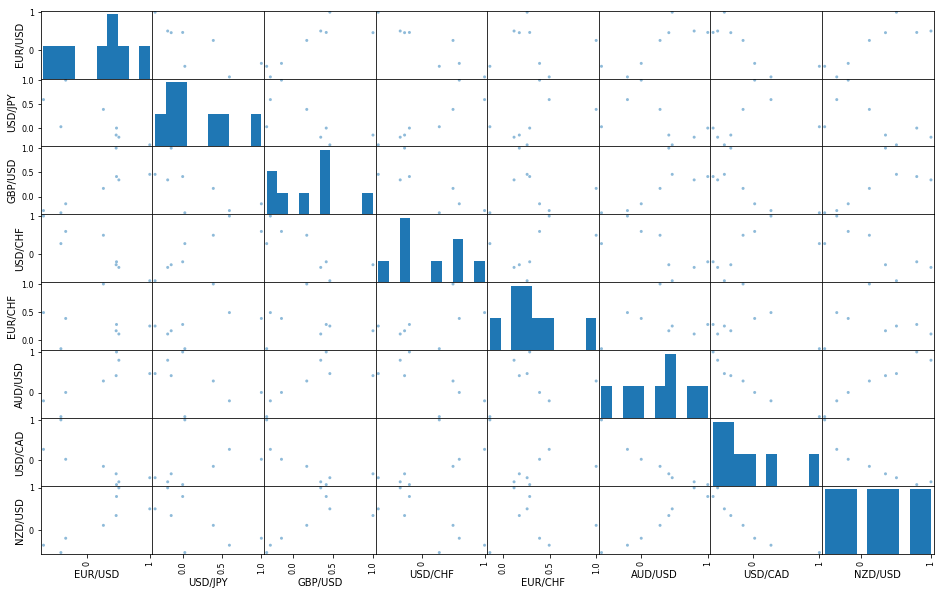

In [111]:
#Plot Scatter Matrix
scatter_matrix(rest_rets, figsize=(16,10))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2caef9c7b8>,
      dtype=object)

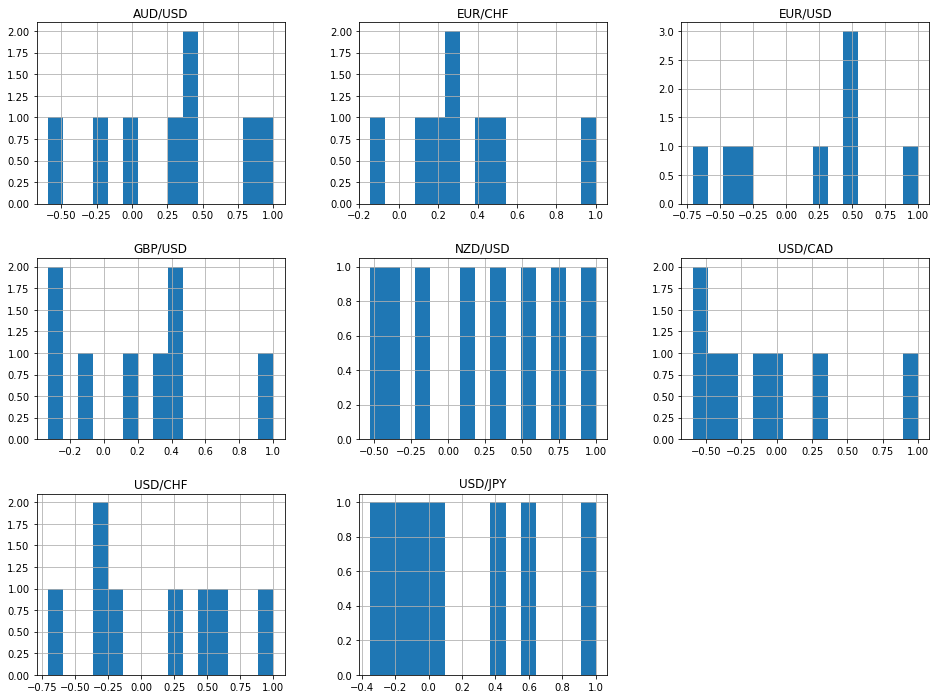

In [112]:
rest_rets.hist(bins=15, figsize=(16,12))

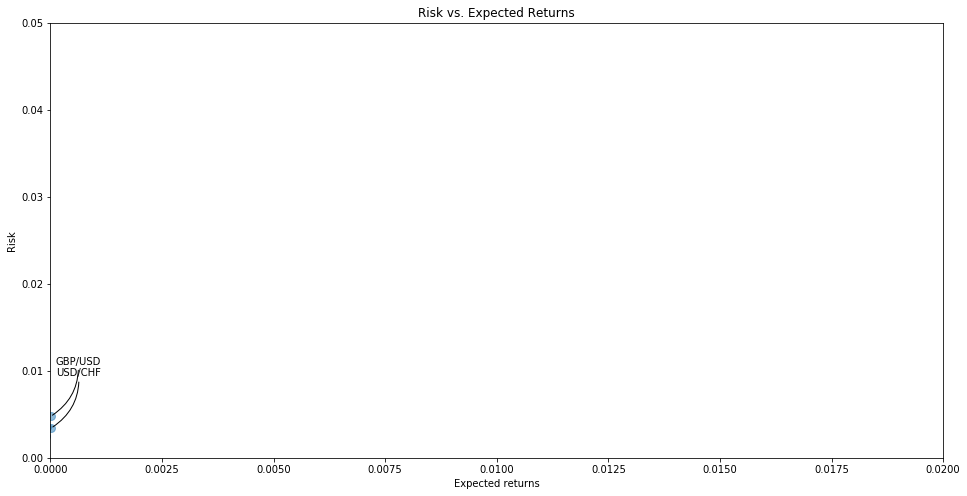

In [113]:
rets = returns.dropna()

area = np.pi*20
plt.figure(figsize=(16,8))
plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

# Set the x and y limits of the plot
plt.ylim([0.0,0.05])
plt.xlim([0.0,0.02])

#Set the plot titles for x and y axis
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title("Risk vs. Expected Returns")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

In [114]:
rest_rets = returns.corr()
pair_value = rest_rets.abs().unstack()
pair_value.sort_values(ascending = False)

NZD/USD  NZD/USD    1.000000
USD/CAD  USD/CAD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
EUR/CHF  EUR/CHF    1.000000
AUD/USD  AUD/USD    1.000000
EUR/USD  EUR/USD    1.000000
NZD/USD  AUD/USD    0.795739
AUD/USD  NZD/USD    0.795739
EUR/USD  USD/CHF    0.705327
USD/CHF  EUR/USD    0.705327
AUD/USD  USD/CAD    0.595549
USD/CAD  AUD/USD    0.595549
USD/JPY  USD/CHF    0.594436
USD/CHF  USD/JPY    0.594436
NZD/USD  USD/CAD    0.527018
USD/CAD  NZD/USD    0.527018
EUR/USD  NZD/USD    0.504063
NZD/USD  EUR/USD    0.504063
EUR/CHF  USD/CHF    0.493951
USD/CHF  EUR/CHF    0.493951
AUD/USD  EUR/USD    0.466359
EUR/USD  AUD/USD    0.466359
GBP/USD  EUR/USD    0.460593
EUR/USD  GBP/USD    0.460593
USD/CAD  EUR/USD    0.425877
EUR/USD  USD/CAD    0.425877
AUD/USD  GBP/USD    0.415340
GBP/USD  AUD/USD    0.415340
                      ...   
EUR/USD  USD/JPY    0.348854
USD/JPY  EUR/USD    0.348854
NZD/USD  GBP/USD    0.346604
GBP/USD  NZD/U

In [115]:
# Normalized Returns Data
Normalized_Value = ((returns[:] - returns[:].min()) /(returns[:].max() - returns[:].min()))
Normalized_Value.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD
date,,,,,,,,
2018-12-24 22:00:00,0.676299,0.285208,0.517619,0.263582,0.260365,0.583853,0.571345,0.599075
2018-12-26 22:00:00,0.306883,0.836340,0.226835,0.939717,0.679848,0.598232,0.373887,0.642279
2018-12-27 22:00:00,0.886054,0.351106,0.411086,0.212634,0.430321,0.364954,0.675721,0.440828
2018-12-28 22:00:00,0.583266,0.250552,0.503060,0.369707,0.265822,0.570273,0.589455,0.633121
2018-12-30 22:00:00,0.512357,0.513489,0.391452,0.573618,0.544781,0.557002,0.513573,0.650124


In [116]:
Normalized_Value.corr()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD
EUR/USD,1.000000,-0.348854,0.460593,-0.705327,0.255956,0.466359,-0.425877,0.504063
USD/JPY,-0.348854,1.000000,-0.144404,0.594436,0.390037,0.001294,0.028795,-0.189029
GBP/USD,0.460593,-0.144404,1.000000,-0.283407,0.171897,0.415340,-0.329484,0.346604
USD/CHF,-0.705327,0.594436,-0.283407,1.000000,0.493951,-0.205797,0.273691,-0.353470
EUR/CHF,0.255956,0.390037,0.171897,0.493951,1.000000,0.283585,-0.145385,0.115121
AUD/USD,0.466359,0.001294,0.415340,-0.205797,0.283585,1.000000,-0.595549,0.795739
USD/CAD,-0.425877,0.028795,-0.329484,0.273691,-0.145385,-0.595549,1.000000,-0.527018
NZD/USD,0.504063,-0.189029,0.346604,-0.353470,0.115121,0.795739,-0.527018,1.000000


In [117]:
normalized_rets = Normalized_Value.corr()
normalized_pair_value = normalized_rets.abs().unstack()
normalized_pair_value.sort_values(ascending = False)

NZD/USD  NZD/USD    1.000000
USD/CAD  USD/CAD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
EUR/CHF  EUR/CHF    1.000000
AUD/USD  AUD/USD    1.000000
EUR/USD  EUR/USD    1.000000
NZD/USD  AUD/USD    0.795739
AUD/USD  NZD/USD    0.795739
EUR/USD  USD/CHF    0.705327
USD/CHF  EUR/USD    0.705327
AUD/USD  USD/CAD    0.595549
USD/CAD  AUD/USD    0.595549
USD/JPY  USD/CHF    0.594436
USD/CHF  USD/JPY    0.594436
NZD/USD  USD/CAD    0.527018
USD/CAD  NZD/USD    0.527018
EUR/USD  NZD/USD    0.504063
NZD/USD  EUR/USD    0.504063
EUR/CHF  USD/CHF    0.493951
USD/CHF  EUR/CHF    0.493951
AUD/USD  EUR/USD    0.466359
EUR/USD  AUD/USD    0.466359
GBP/USD  EUR/USD    0.460593
EUR/USD  GBP/USD    0.460593
USD/CAD  EUR/USD    0.425877
EUR/USD  USD/CAD    0.425877
AUD/USD  GBP/USD    0.415340
GBP/USD  AUD/USD    0.415340
                      ...   
EUR/USD  USD/JPY    0.348854
USD/JPY  EUR/USD    0.348854
NZD/USD  GBP/USD    0.346604
GBP/USD  NZD/U

In [0]:
stocks = ['GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK']

In [0]:
relate_industry = pd.DataFrame()

for stock in stocks:
  relate_industry[stock] =  con.get_candles(stock, period='D1', number=250)['bidclose']
 

In [136]:
relate_industry.head()

,GBP/CAD,GBP/NZD,GBP/AUD,AUD/NZD,USD/SEK,EUR/SEK
date,,,,,,
2018-12-23 22:00:00,1.71874,1.87902,1.79552,1.04579,NaN,NaN
2018-12-24 22:00:00,1.72940,1.88882,1.80133,1.04820,9.03232,10.31661
2018-12-26 22:00:00,1.71460,1.87672,1.78691,1.04943,9.09027,10.32032
2018-12-27 22:00:00,1.72138,1.88612,1.79753,1.04860,9.00360,10.29080
2018-12-28 22:00:00,1.73101,1.89252,1.80333,1.04827,8.96090,10.25650


In [137]:
relate_industry.describe()

,GBP/CAD,GBP/NZD,GBP/AUD,AUD/NZD,USD/SEK,EUR/SEK
count,250.000000,248.000000,250.000000,248.000000,241.000000,243.000000
mean,1.690319,1.917766,1.819786,1.053312,9.407878,10.560660
std,0.052413,0.033882,0.026860,0.011422,0.243714,0.162913
min,1.588270,1.837020,1.767740,1.029040,8.863900,10.154530
25%,1.637665,1.890220,1.796833,1.045378,9.265200,10.453265
50%,1.702600,1.921920,1.820110,1.052745,9.409300,10.575390
75%,1.739150,1.940420,1.836585,1.060027,9.610300,10.691415
max,1.773920,1.993530,1.885920,1.081930,9.956540,10.925200


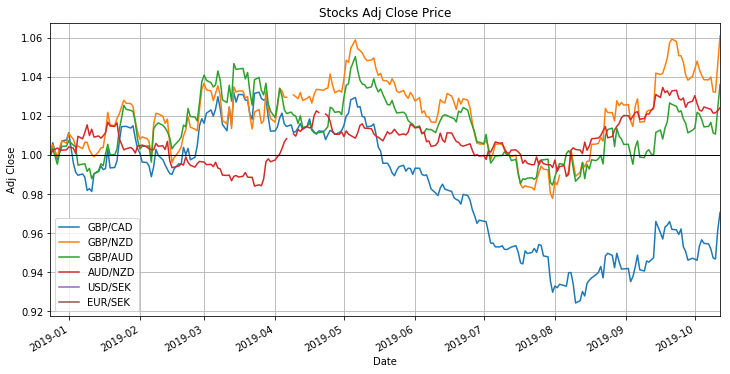

In [138]:
#for stock in stocks:
    # df = pdr.get_data_yahoo(symbols, start, end)['Adj Close']
normalize_stocks = relate_industry.apply(lambda x: x / x[0])
normalize_stocks.plot(figsize=(12,6)).axhline(1, lw=1, color='black')
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.grid()
plt.title("Stocks Adj Close Price")
plt.show()

In [139]:
corr_drinks = .corr()
corr_drinks

,GBP/CAD,GBP/NZD,GBP/AUD,AUD/NZD,USD/SEK,EUR/SEK
GBP/CAD,1.000000,0.409284,0.710089,-0.290971,-0.540871,-0.466297
GBP/NZD,0.409284,1.000000,0.791377,0.556241,0.358728,0.346128
GBP/AUD,0.710089,0.791377,1.000000,-0.059446,0.086712,0.164819
AUD/NZD,-0.290971,0.556241,-0.059446,1.000000,0.455787,0.327586
USD/SEK,-0.540871,0.358728,0.086712,0.455787,1.000000,0.953622
EUR/SEK,-0.466297,0.346128,0.164819,0.327586,0.953622,1.000000


In [154]:
relate_industry.columns

Index(['GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK'], dtype='object')

In [155]:
DPS = df
DPS = DPS.assign(DPS = relate_industry['GBP/CAD'].values)
DPS.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,DPS
date,,,,,,,,,
2018-12-23 22:00:00,1.13672,110.924,1.26444,0.99354,1.13056,0.70372,1.35931,0.67232,1.71874
2018-12-24 22:00:00,1.13989,110.324,1.26994,0.98685,1.12697,0.70495,1.36089,0.67218,1.72940
2018-12-26 22:00:00,1.13512,111.354,1.26324,0.99555,1.12991,0.70652,1.35727,0.67288,1.71460
2018-12-27 22:00:00,1.14278,110.948,1.26428,0.98768,1.12897,0.70260,1.36159,0.66966,1.72138
2018-12-28 22:00:00,1.14396,110.245,1.26917,0.98344,1.12547,0.70351,1.36365,0.67018,1.73101


In [156]:
DPS_rets = DPS.pct_change().dropna()
DPS_rets.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,DPS
date,,,,,,,,,
2018-12-24 22:00:00,0.002789,-0.005409,0.004350,-0.006733,-0.003175,0.001748,0.001162,-0.000208,0.006202
2018-12-26 22:00:00,-0.004185,0.009336,-0.005276,0.008816,0.002609,0.002227,-0.002660,0.001041,-0.008558
2018-12-27 22:00:00,0.006748,-0.003646,0.000823,-0.007905,-0.000832,-0.005548,0.003183,-0.004785,0.003954
2018-12-28 22:00:00,0.001033,-0.006336,0.003868,-0.004293,-0.003100,0.001295,0.001513,0.000777,0.005594
2018-12-30 22:00:00,-0.000306,0.000698,0.000173,0.000397,0.000746,0.000853,0.000044,0.001268,0.000468


In [157]:
DPS_rets.corr()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,DPS
EUR/USD,1.000000,-0.348854,0.460593,-0.705327,0.255956,0.466359,-0.425877,0.504063,0.186827
USD/JPY,-0.348854,1.000000,-0.144404,0.594436,0.390037,0.001294,0.028795,-0.189029,-0.134911
GBP/USD,0.460593,-0.144404,1.000000,-0.283407,0.171897,0.415340,-0.329484,0.346604,0.784670
USD/CHF,-0.705327,0.594436,-0.283407,1.000000,0.493951,-0.205797,0.273691,-0.353470,-0.111665
EUR/CHF,0.255956,0.390037,0.171897,0.493951,1.000000,0.283585,-0.145385,0.115121,0.074375
AUD/USD,0.466359,0.001294,0.415340,-0.205797,0.283585,1.000000,-0.595549,0.795739,0.029919
USD/CAD,-0.425877,0.028795,-0.329484,0.273691,-0.145385,-0.595549,1.000000,-0.527018,0.322625
NZD/USD,0.504063,-0.189029,0.346604,-0.353470,0.115121,0.795739,-0.527018,1.000000,0.006922
DPS,0.186827,-0.134911,0.784670,-0.111665,0.074375,0.029919,0.322625,0.006922,1.000000


In [158]:
DPS_rets = DPS_rets.corr()
pair_value_1 = DPS_rets.abs().unstack()
pair_value_1.sort_values(ascending = False)

DPS      DPS        1.000000
NZD/USD  NZD/USD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
AUD/USD  AUD/USD    1.000000
USD/CAD  USD/CAD    1.000000
EUR/CHF  EUR/CHF    1.000000
EUR/USD  EUR/USD    1.000000
NZD/USD  AUD/USD    0.795739
AUD/USD  NZD/USD    0.795739
GBP/USD  DPS        0.784670
DPS      GBP/USD    0.784670
USD/CHF  EUR/USD    0.705327
EUR/USD  USD/CHF    0.705327
USD/CAD  AUD/USD    0.595549
AUD/USD  USD/CAD    0.595549
USD/JPY  USD/CHF    0.594436
USD/CHF  USD/JPY    0.594436
NZD/USD  USD/CAD    0.527018
USD/CAD  NZD/USD    0.527018
EUR/USD  NZD/USD    0.504063
NZD/USD  EUR/USD    0.504063
EUR/CHF  USD/CHF    0.493951
USD/CHF  EUR/CHF    0.493951
EUR/USD  AUD/USD    0.466359
AUD/USD  EUR/USD    0.466359
GBP/USD  EUR/USD    0.460593
EUR/USD  GBP/USD    0.460593
USD/CAD  EUR/USD    0.425877
                      ...   
EUR/USD  EUR/CHF    0.255956
EUR/CHF  EUR/USD    0.255956
AUD/USD  USD/CHF    0.205797
USD/CHF  AUD/U

In [0]:
relate_industry.columns
FIZZ = FIZZ.join(relate_industry['GBP/NZD'])


In [162]:
FIZZ.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,USD/ZAR,GBP/CAD,GBP/NZD
date,,,,,,,,,,,
2018-12-23 22:00:00,1.13672,110.924,1.26444,0.99354,1.13056,0.70372,1.35931,0.67232,14.60406,1.71874,1.87902
2018-12-24 22:00:00,1.13989,110.324,1.26994,0.98685,1.12697,0.70495,1.36089,0.67218,14.56340,1.72940,1.88882
2018-12-26 22:00:00,1.13512,111.354,1.26324,0.99555,1.12991,0.70652,1.35727,0.67288,14.54350,1.71460,1.87672
2018-12-27 22:00:00,1.14278,110.948,1.26428,0.98768,1.12897,0.70260,1.36159,0.66966,14.46960,1.72138,1.88612
2018-12-28 22:00:00,1.14396,110.245,1.26917,0.98344,1.12547,0.70351,1.36365,0.67018,14.41270,1.73101,1.89252


In [163]:
#relate_industry['USD/JPY'].head()
relate_industry.columns

Index(['GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK'], dtype='object')

In [164]:
FIZZ_rets = FIZZ.pct_change().dropna()
FIZZ_rets.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,USD/ZAR,GBP/CAD,GBP/NZD
date,,,,,,,,,,,
2018-12-24 22:00:00,0.002789,-0.005409,0.004350,-0.006733,-0.003175,0.001748,0.001162,-0.000208,-0.002784,0.006202,0.005215
2018-12-26 22:00:00,-0.004185,0.009336,-0.005276,0.008816,0.002609,0.002227,-0.002660,0.001041,-0.001366,-0.008558,-0.006406
2018-12-27 22:00:00,0.006748,-0.003646,0.000823,-0.007905,-0.000832,-0.005548,0.003183,-0.004785,-0.005081,0.003954,0.005009
2018-12-28 22:00:00,0.001033,-0.006336,0.003868,-0.004293,-0.003100,0.001295,0.001513,0.000777,-0.003932,0.005594,0.003393
2018-12-30 22:00:00,-0.000306,0.000698,0.000173,0.000397,0.000746,0.000853,0.000044,0.001268,0.000685,0.000468,-0.001189


In [165]:
FIZZ_rets.corr()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,USD/ZAR,GBP/CAD,GBP/NZD
EUR/USD,1.000000,-0.348854,0.460593,-0.705327,0.255956,0.466359,-0.425877,0.504063,-0.341549,0.186827,0.007320
USD/JPY,-0.348854,1.000000,-0.144404,0.594436,0.390037,0.001294,0.028795,-0.189029,-0.049241,-0.134911,0.022328
GBP/USD,0.460593,-0.144404,1.000000,-0.283407,0.171897,0.415340,-0.329484,0.346604,-0.321131,0.784670,0.629999
USD/CHF,-0.705327,0.594436,-0.283407,1.000000,0.493951,-0.205797,0.273691,-0.353470,0.129030,-0.111665,0.030465
EUR/CHF,0.255956,0.390037,0.171897,0.493951,1.000000,0.283585,-0.145385,0.115121,-0.236411,0.074375,0.062384
AUD/USD,0.466359,0.001294,0.415340,-0.205797,0.283585,1.000000,-0.595549,0.795739,-0.625196,0.029919,-0.278338
USD/CAD,-0.425877,0.028795,-0.329484,0.273691,-0.145385,-0.595549,1.000000,-0.527018,0.465032,0.322625,0.145074
NZD/USD,0.504063,-0.189029,0.346604,-0.353470,0.115121,0.795739,-0.527018,1.000000,-0.465716,0.006922,-0.504750
USD/ZAR,-0.341549,-0.049241,-0.321131,0.129030,-0.236411,-0.625196,0.465032,-0.465716,1.000000,-0.014651,0.094613
GBP/CAD,0.186827,-0.134911,0.784670,-0.111665,0.074375,0.029919,0.322625,0.006922,-0.014651,1.000000,0.723852


In [166]:
FIZZ_rets = FIZZ_rets.corr()
pair_value_2 = FIZZ_rets.abs().unstack()
pair_value_2.sort_values(ascending = False)

GBP/NZD  GBP/NZD    1.000000
GBP/CAD  GBP/CAD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
EUR/CHF  EUR/CHF    1.000000
USD/CAD  USD/CAD    1.000000
NZD/USD  NZD/USD    1.000000
USD/ZAR  USD/ZAR    1.000000
AUD/USD  AUD/USD    1.000000
EUR/USD  EUR/USD    1.000000
AUD/USD  NZD/USD    0.795739
NZD/USD  AUD/USD    0.795739
GBP/USD  GBP/CAD    0.784670
GBP/CAD  GBP/USD    0.784670
         GBP/NZD    0.723852
GBP/NZD  GBP/CAD    0.723852
USD/CHF  EUR/USD    0.705327
EUR/USD  USD/CHF    0.705327
GBP/NZD  GBP/USD    0.629999
GBP/USD  GBP/NZD    0.629999
USD/ZAR  AUD/USD    0.625196
AUD/USD  USD/ZAR    0.625196
USD/CAD  AUD/USD    0.595549
AUD/USD  USD/CAD    0.595549
USD/JPY  USD/CHF    0.594436
USD/CHF  USD/JPY    0.594436
NZD/USD  USD/CAD    0.527018
USD/CAD  NZD/USD    0.527018
NZD/USD  GBP/NZD    0.504750
                      ...   
USD/ZAR  USD/CHF    0.129030
USD/CHF  USD/ZAR    0.129030
EUR/CHF  NZD/USD    0.115121
NZD/USD  EUR/C

In [168]:
KO = pd.concat([df, relate_industry['GBP/AUD']], axis=1)
KO.head()


,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,GBP/AUD
date,,,,,,,,,
2018-12-23 22:00:00,1.13672,110.924,1.26444,0.99354,1.13056,0.70372,1.35931,0.67232,1.79552
2018-12-24 22:00:00,1.13989,110.324,1.26994,0.98685,1.12697,0.70495,1.36089,0.67218,1.80133
2018-12-26 22:00:00,1.13512,111.354,1.26324,0.99555,1.12991,0.70652,1.35727,0.67288,1.78691
2018-12-27 22:00:00,1.14278,110.948,1.26428,0.98768,1.12897,0.70260,1.36159,0.66966,1.79753
2018-12-28 22:00:00,1.14396,110.245,1.26917,0.98344,1.12547,0.70351,1.36365,0.67018,1.80333


In [169]:
KO_rets = KO.pct_change().dropna()
KO_rets.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,GBP/AUD
date,,,,,,,,,
2018-12-24 22:00:00,0.002789,-0.005409,0.004350,-0.006733,-0.003175,0.001748,0.001162,-0.000208,0.003236
2018-12-26 22:00:00,-0.004185,0.009336,-0.005276,0.008816,0.002609,0.002227,-0.002660,0.001041,-0.008005
2018-12-27 22:00:00,0.006748,-0.003646,0.000823,-0.007905,-0.000832,-0.005548,0.003183,-0.004785,0.005943
2018-12-28 22:00:00,0.001033,-0.006336,0.003868,-0.004293,-0.003100,0.001295,0.001513,0.000777,0.003227
2018-12-30 22:00:00,-0.000306,0.000698,0.000173,0.000397,0.000746,0.000853,0.000044,0.001268,0.000133


In [170]:
KO_rets.corr()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,GBP/AUD
EUR/USD,1.000000,-0.348854,0.460593,-0.705327,0.255956,0.466359,-0.425877,0.504063,0.061619
USD/JPY,-0.348854,1.000000,-0.144404,0.594436,0.390037,0.001294,0.028795,-0.189029,-0.143158
GBP/USD,0.460593,-0.144404,1.000000,-0.283407,0.171897,0.415340,-0.329484,0.346604,0.624240
USD/CHF,-0.705327,0.594436,-0.283407,1.000000,0.493951,-0.205797,0.273691,-0.353470,-0.108063
EUR/CHF,0.255956,0.390037,0.171897,0.493951,1.000000,0.283585,-0.145385,0.115121,-0.071111
AUD/USD,0.466359,0.001294,0.415340,-0.205797,0.283585,1.000000,-0.595549,0.795739,-0.446178
USD/CAD,-0.425877,0.028795,-0.329484,0.273691,-0.145385,-0.595549,1.000000,-0.527018,0.192177
NZD/USD,0.504063,-0.189029,0.346604,-0.353470,0.115121,0.795739,-0.527018,1.000000,-0.341058
GBP/AUD,0.061619,-0.143158,0.624240,-0.108063,-0.071111,-0.446178,0.192177,-0.341058,1.000000


In [171]:
KO_rets = KO_rets.corr()
pair_value_3 = KO_rets.abs().unstack()
pair_value_3.sort_values(ascending = False)

GBP/AUD  GBP/AUD    1.000000
NZD/USD  NZD/USD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
AUD/USD  AUD/USD    1.000000
USD/CAD  USD/CAD    1.000000
EUR/CHF  EUR/CHF    1.000000
EUR/USD  EUR/USD    1.000000
NZD/USD  AUD/USD    0.795739
AUD/USD  NZD/USD    0.795739
EUR/USD  USD/CHF    0.705327
USD/CHF  EUR/USD    0.705327
GBP/AUD  GBP/USD    0.624240
GBP/USD  GBP/AUD    0.624240
AUD/USD  USD/CAD    0.595549
USD/CAD  AUD/USD    0.595549
USD/CHF  USD/JPY    0.594436
USD/JPY  USD/CHF    0.594436
NZD/USD  USD/CAD    0.527018
USD/CAD  NZD/USD    0.527018
NZD/USD  EUR/USD    0.504063
EUR/USD  NZD/USD    0.504063
USD/CHF  EUR/CHF    0.493951
EUR/CHF  USD/CHF    0.493951
AUD/USD  EUR/USD    0.466359
EUR/USD  AUD/USD    0.466359
GBP/USD  EUR/USD    0.460593
EUR/USD  GBP/USD    0.460593
GBP/AUD  AUD/USD    0.446178
                      ...   
USD/CAD  USD/CHF    0.273691
USD/CHF  USD/CAD    0.273691
EUR/USD  EUR/CHF    0.255956
EUR/CHF  EUR/U

In [174]:
#relate_industry.columns
PEP = pd.concat([df, relate_industry['AUD/NZD']], axis=1)
PEP.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,AUD/NZD
date,,,,,,,,,
2018-12-23 22:00:00,1.13672,110.924,1.26444,0.99354,1.13056,0.70372,1.35931,0.67232,1.04579
2018-12-24 22:00:00,1.13989,110.324,1.26994,0.98685,1.12697,0.70495,1.36089,0.67218,1.04820
2018-12-26 22:00:00,1.13512,111.354,1.26324,0.99555,1.12991,0.70652,1.35727,0.67288,1.04943
2018-12-27 22:00:00,1.14278,110.948,1.26428,0.98768,1.12897,0.70260,1.36159,0.66966,1.04860
2018-12-28 22:00:00,1.14396,110.245,1.26917,0.98344,1.12547,0.70351,1.36365,0.67018,1.04827


In [175]:
PEP_rets = PEP.pct_change().dropna()
PEP_rets.head()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,AUD/NZD
date,,,,,,,,,
2018-12-24 22:00:00,0.002789,-0.005409,0.004350,-0.006733,-0.003175,0.001748,0.001162,-0.000208,0.002304
2018-12-26 22:00:00,-0.004185,0.009336,-0.005276,0.008816,0.002609,0.002227,-0.002660,0.001041,0.001173
2018-12-27 22:00:00,0.006748,-0.003646,0.000823,-0.007905,-0.000832,-0.005548,0.003183,-0.004785,-0.000791
2018-12-28 22:00:00,0.001033,-0.006336,0.003868,-0.004293,-0.003100,0.001295,0.001513,0.000777,-0.000315
2018-12-30 22:00:00,-0.000306,0.000698,0.000173,0.000397,0.000746,0.000853,0.000044,0.001268,0.000229


In [176]:
PEP_rets.corr()

,EUR/USD,USD/JPY,GBP/USD,USD/CHF,EUR/CHF,AUD/USD,USD/CAD,NZD/USD,AUD/NZD
EUR/USD,1.000000,-0.348854,0.460593,-0.705327,0.255956,0.466359,-0.425877,0.504063,-0.086434
USD/JPY,-0.348854,1.000000,-0.144404,0.594436,0.390037,0.001294,0.028795,-0.189029,0.300475
GBP/USD,0.460593,-0.144404,1.000000,-0.283407,0.171897,0.415340,-0.329484,0.346604,0.086456
USD/CHF,-0.705327,0.594436,-0.283407,1.000000,0.493951,-0.205797,0.273691,-0.353470,0.249640
EUR/CHF,0.255956,0.390037,0.171897,0.493951,1.000000,0.283585,-0.145385,0.115121,0.253955
AUD/USD,0.466359,0.001294,0.415340,-0.205797,0.283585,1.000000,-0.595549,0.795739,0.254564
USD/CAD,-0.425877,0.028795,-0.329484,0.273691,-0.145385,-0.595549,1.000000,-0.527018,-0.059169
NZD/USD,0.504063,-0.189029,0.346604,-0.353470,0.115121,0.795739,-0.527018,1.000000,-0.375050
AUD/NZD,-0.086434,0.300475,0.086456,0.249640,0.253955,0.254564,-0.059169,-0.375050,1.000000


In [177]:
PEP_rets = PEP_rets.corr()
pair_value_4 = PEP_rets.abs().unstack()
pair_value_4.sort_values(ascending = False)

AUD/NZD  AUD/NZD    1.000000
NZD/USD  NZD/USD    1.000000
USD/JPY  USD/JPY    1.000000
GBP/USD  GBP/USD    1.000000
USD/CHF  USD/CHF    1.000000
AUD/USD  AUD/USD    1.000000
USD/CAD  USD/CAD    1.000000
EUR/CHF  EUR/CHF    1.000000
EUR/USD  EUR/USD    1.000000
NZD/USD  AUD/USD    0.795739
AUD/USD  NZD/USD    0.795739
USD/CHF  EUR/USD    0.705327
EUR/USD  USD/CHF    0.705327
USD/CAD  AUD/USD    0.595549
AUD/USD  USD/CAD    0.595549
USD/JPY  USD/CHF    0.594436
USD/CHF  USD/JPY    0.594436
NZD/USD  USD/CAD    0.527018
USD/CAD  NZD/USD    0.527018
EUR/USD  NZD/USD    0.504063
NZD/USD  EUR/USD    0.504063
USD/CHF  EUR/CHF    0.493951
EUR/CHF  USD/CHF    0.493951
AUD/USD  EUR/USD    0.466359
EUR/USD  AUD/USD    0.466359
GBP/USD  EUR/USD    0.460593
EUR/USD  GBP/USD    0.460593
         USD/CAD    0.425877
USD/CAD  EUR/USD    0.425877
GBP/USD  AUD/USD    0.415340
                      ...   
EUR/USD  EUR/CHF    0.255956
EUR/CHF  EUR/USD    0.255956
AUD/NZD  AUD/USD    0.254564
AUD/USD  AUD/N

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


0.0


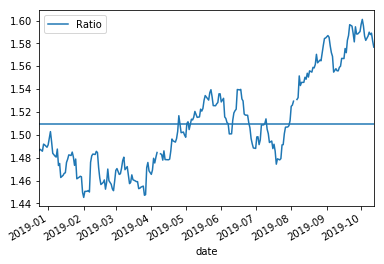

In [188]:
# Z-Value Rules Strategies
# To confirm when to enter and exit a position of pairs trading, mean spread and standard deviation of formation period should be calculated first, based on this data, calculate each day’s price spread and Z-Score.
# Entry: When the absolute value of Z-Score more than 1, enter a position by buying stock with lower price and selling the higher one.
# Exit: When the absolute value of Z-Score less than -1, exit the position by selling the stock with lower price and buying the higher one.
import statsmodels
from statsmodels.tsa.stattools import coint

S1 = relate_industry['GBP/NZD']
S2 = df['GBP/USD']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()

In [186]:
corr_rest.head

<bound method NDFrame.head of           EUR/USD   USD/JPY   GBP/USD  ...   AUD/USD   USD/CAD   NZD/USD
EUR/USD  1.000000  0.436446  0.648822  ...  0.833132 -0.008509  0.856516
USD/JPY  0.436446  1.000000  0.861515  ...  0.725463  0.398013  0.668101
GBP/USD  0.648822  0.861515  1.000000  ...  0.841838  0.250987  0.790804
USD/CHF -0.023768  0.771515  0.591003  ...  0.332310  0.480299  0.220840
EUR/CHF  0.715341  0.859822  0.888532  ...  0.844958  0.327676  0.788968
AUD/USD  0.833132  0.725463  0.841838  ...  1.000000  0.000586  0.934544
USD/CAD -0.008509  0.398013  0.250987  ...  0.000586  1.000000 -0.051350
NZD/USD  0.856516  0.668101  0.790804  ...  0.934544 -0.051350  1.000000

[8 rows x 8 columns]>

In [189]:
df.columns

Index(['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD',
       'USD/CAD', 'NZD/USD'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:1432: CollinearityWarning: y0 and y1 are (almost) perfectly colinear.Cointegration test is not reliable in this case.
  CollinearityWarning)


0.0


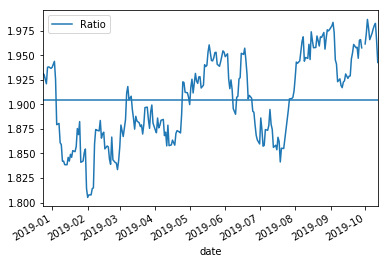

In [193]:
S1 = df['USD/CAD']
S2 = df['AUD/USD']
score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot()
plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()

In [0]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

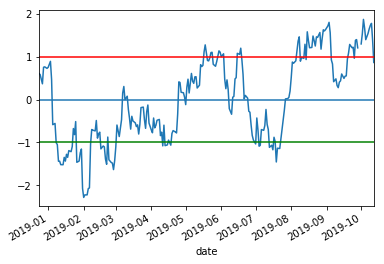

In [195]:
zscore(ratios).plot()
plt.axhline(zscore(ratios).mean())
plt.axhline(1.0, color='red')
plt.axhline(-1.0, color='green')
plt.show()

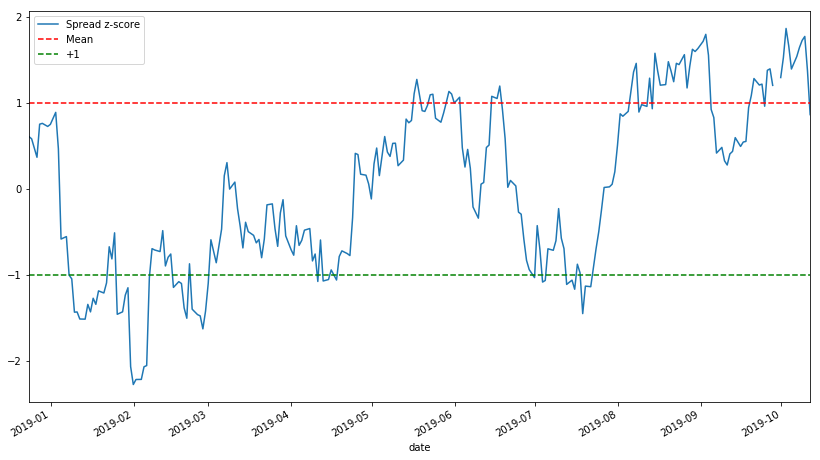

In [198]:
zscore(ratios).plot(figsize=(14,8))
#plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='r', ls='--')
plt.axhline(-1.0, c='g', ls='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

In [199]:

ratios = relate_industry['GBP/NZD'] / df['GBP/USD']
print(len(ratios))

250


In [200]:
ratios = df['USD/CAD'] / df['AUD/USD']
print(len(ratios))

250


In [203]:
#con.get_candles(symbol, period='D1', number=250)['bidclose']
#SPY = yf.download('SPY',start,end)['Adj Close']
SPY = con.get_candles('AUD/CAD',period='D1', number=250)['bidclose']
SPY.head()

date
2018-12-21 22:00:00    0.95597
2018-12-23 22:00:00    0.95660
2018-12-24 22:00:00    0.95947
2018-12-26 22:00:00    0.95895
2018-12-27 22:00:00    0.95670
Name: bidclose, dtype: float64

In [0]:
SPY.rets = SPY.pct_change(1).dropna()

In [205]:
SPY_risk = SPY.std()
SPY_risk

0.02139854536320271

In [206]:
rf = 0.018 # risk free rate
excess_returns_1 = relate_industry['GBP/NZD'].pct_change(1).dropna() - rf
excess_returns_1.head()

date
2018-12-24 22:00:00   -0.012785
2018-12-26 22:00:00   -0.024406
2018-12-27 22:00:00   -0.012991
2018-12-28 22:00:00   -0.014607
2018-12-30 22:00:00   -0.019189
Name: GBP/NZD, dtype: float64

In [0]:

excess_returns_2 = df['GBP/USD'].pct_change(1).dropna() - rf
excess_returns_3 = df['USD/CAD'].pct_change(1).dropna() - rf
excess_returns_4 = df['AUD/USD'].pct_change(1).dropna() - rf

In [209]:
ret = pd.concat([relate_industry['GBP/NZD'].pct_change(1).dropna(),df['GBP/USD'].pct_change(1).dropna(),df['USD/CAD'].pct_change(1).dropna(),df['AUD/USD'].pct_change(1).dropna()], axis=1)
ret.head()

,GBP/NZD,GBP/USD,USD/CAD,AUD/USD
date,,,,
2018-12-24 22:00:00,0.005215,0.004350,0.001162,0.001748
2018-12-26 22:00:00,-0.006406,-0.005276,-0.002660,0.002227
2018-12-27 22:00:00,0.005009,0.000823,0.003183,-0.005548
2018-12-28 22:00:00,0.003393,0.003868,0.001513,0.001295
2018-12-30 22:00:00,-0.001189,0.000173,0.000044,0.000853


In [210]:
excess_returns = pd.concat([excess_returns_1, excess_returns_2, excess_returns_3, excess_returns_4],axis=1)
excess_returns.head()

,GBP/NZD,GBP/USD,USD/CAD,AUD/USD
date,,,,
2018-12-24 22:00:00,-0.012785,-0.013650,-0.016838,-0.016252
2018-12-26 22:00:00,-0.024406,-0.023276,-0.020660,-0.015773
2018-12-27 22:00:00,-0.012991,-0.017177,-0.014817,-0.023548
2018-12-28 22:00:00,-0.014607,-0.014132,-0.016487,-0.016705
2018-12-30 22:00:00,-0.019189,-0.017827,-0.017956,-0.017147


In [211]:
excess_returns.mean()

GBP/NZD   -0.017749
GBP/USD   -0.017989
USD/CAD   -0.018116
AUD/USD   -0.018135
dtype: float64

In [212]:
excess_returns.std()

GBP/NZD    0.005199
GBP/USD    0.004775
USD/CAD    0.003100
AUD/USD    0.004150
dtype: float64

In [213]:
sharpe_ratio = excess_returns.mean()/excess_returns.std()
print('Sharpe Ratio:')
sharpe_ratio

Sharpe Ratio:


GBP/NZD   -3.413929
GBP/USD   -3.767343
USD/CAD   -5.843226
AUD/USD   -4.369804
dtype: float64

In [216]:

from scipy import stats

beta, alpha, r_value, p_value, std_err = stats.linregress(relate_industry['GBP/NZD'].pct_change(1).dropna(), SPY.rets)
print("GBP/NZD and AUD/CAD")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)


GBP/NZD and GBP/USD
Beta: 			-0.039851
Alpha: 			-0.000244
R-Squared: 		-0.061125
p-value: 		 0.336766
Standard Error: 	 0.041406


In [217]:
beta, alpha, r_value, p_value, std_err = stats.linregress(df['GBP/USD'].pct_change(1).dropna(), SPY.rets)
print("GBP/USD and AUD/CAD")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

GBP/USD and AUD/CAD
Beta: 			 0.052732
Alpha: 			-0.000255
R-Squared: 		 0.074285
p-value: 		 0.242844
Standard Error: 	 0.045043


In [219]:

beta, alpha, r_value, p_value, std_err = stats.linregress(df['USD/CAD'].pct_change(1).dropna(), SPY.rets)
print("USD/CAD and AUD/CAD")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)



USD/CAD and AUD/CAD
Beta: 			 0.161037
Alpha: 			-0.000236
R-Squared: 		 0.147294
p-value: 		 0.020058
Standard Error: 	 0.068806


In [220]:
beta, alpha, r_value, p_value, std_err = stats.linregress(df['AUD/USD'].pct_change(1).dropna(), SPY.rets)
print("AUD/USD and AUD/CAD")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

AUD/USD and AUD/CAD
Beta: 			 0.224290
Alpha: 			-0.000224
R-Squared: 		 0.274616
p-value: 		 0.000011
Standard Error: 	 0.049970


In [222]:
beta, alpha, r_value, p_value, std_err = stats.linregress(relate_industry['GBP/NZD'].pct_change(1).dropna(), df['GBP/USD'].pct_change(1).dropna())
print("FIZZ and TACO")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

FIZZ and TACO
Beta: 			 0.578619
Alpha: 			-0.000134
R-Squared: 		 0.629999
p-value: 		 0.000000
Standard Error: 	 0.045384


In [223]:

beta, alpha, r_value, p_value, std_err = stats.linregress(df['USD/CAD'].pct_change(1).dropna(), df['AUD/USD'].pct_change(1).dropna())
print("SONC and WEN")
print("Beta: 			%9.6f" % beta)
print("Alpha: 			%9.6f" % alpha)
print("R-Squared: 		%9.6f" % r_value)
print("p-value: 		%9.6f" % p_value)
print("Standard Error: 	%9.6f" % std_err)

SONC and WEN
Beta: 			-0.797212
Alpha: 			-0.000228
R-Squared: 		-0.595549
p-value: 		 0.000000
Standard Error: 	 0.068422


In [224]:

rf = 0.018
mrk_rate_ret = (SPY.rets[-1] -SPY.rets[0])/ SPY.rets[0]
m = np.matrix([ret['AUD/USD'], SPY.rets])
beta = np.cov(m)[0][1] / np.std(SPY.rets)
er = rf + beta*(mrk_rate_ret-rf)
tr = (er - rf) / beta
print('Treynor Ratio: ', tr)

Treynor Ratio:  -4.397538303814256


In [225]:
# Beta
print("Beta:")
for column in ret:
    mrk_rate_ret = (SPY.rets[-1] -SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    print(ret[column].name,beta)

Beta:
GBP/NZD -0.00031842561471397704
GBP/USD 0.00035542141989945166
USD/CAD 0.0004575777858022961
AUD/USD 0.0011419874553463736


In [227]:
# Alpha
print("Alpha:")
for column in ret:
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    alpha = np.mean(ret[column]) - beta * np.mean(SPY.rets)
    print(ret[column].name, alpha)

Alpha:
GBP/NZD 0.00025094808702369925
GBP/USD 1.112472350292273e-05
USD/CAD -0.00011570954439654388
AUD/USD -0.0001349673523058472


In [230]:
# Unsystematic Risk or Total Risk
Close = pd.concat([relate_industry['GBP/NZD'], df['GBP/USD'], df['USD/CAD'], df['AUD/USD']], axis=1)
# Close = AdjClose.applymap(float)
Stock_risk = Close.std()
Unsystematic_risk = Stock_risk - beta*SPY_risk
print('Unsystematic Risk:')
print(Unsystematic_risk)



Unsystematic Risk:
GBP/NZD    0.033857
GBP/USD    0.034510
USD/CAD    0.012856
AUD/USD    0.014596
dtype: float64


In [231]:

# Treynor Ratio
print("Treynor Ratio:")
for column in ret:
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    tr = (er - rf) / beta
    print(ret[column].name,tr)

Treynor Ratio:
GBP/NZD -4.397538303814251
GBP/USD -4.3975383038142555
USD/CAD -4.397538303814255
AUD/USD -4.397538303814256


In [232]:
# Modigliani Ratio, M2
print("Modigliani Ratio:")
for column in ret:
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    np_rf = np.empty(len(ret))
    np_rf.fill(rf)
    rdiff = ret[column] - np_rf
    bdiff = SPY.rets - np_rf
    mr = (er - rf) * np.std(rdiff) / np.std(bdiff) + rf
    print(ret[column].name,mr)

Modigliani Ratio:
GBP/NZD 0.020147783535400733
GBP/USD 0.015798196728702404
USD/CAD 0.01615950662679507
AUD/USD 0.01185124802821293


In [233]:
print("Information Ratio:")
for column in ret:
    diff = ret[column] - SPY.rets
    ir = np.mean(diff) / np.std(diff)
    print(ret[column].name, ir)

Information Ratio:
GBP/NZD 0.0754702567942545
GBP/USD 0.05104094530523185
USD/CAD 0.0343409305580229
AUD/USD 0.03906502616716381


In [234]:
print('Omega Ratio:')
for column in ret:
    annual_return_threshhold = 0.0
    returns = ret[column]
    daily_return_thresh = pow(1 + annual_return_threshhold, 1 / 252) - 1

    returns_less_thresh = returns - daily_return_thresh

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])
    if denom > 0.0:
         omega_ratio = numer / denom
    else:
        print('none')
    print(ret[column].name, omega_ratio)

Omega Ratio:
GBP/NZD 1.1446002751038415
GBP/USD 1.006542082573575
USD/CAD 0.9038804935665133
AUD/USD 0.9156513984199619


In [235]:
print('Sortino Ratio:')

for column in ret:
    returns = ret[column]
    numer = pow((1 + returns.mean()), 252) - 1
    annual_volatility = returns.std() * np.sqrt(252)
    denom = annual_volatility

    if denom > 0.0:
         sortino_ratio = numer / denom
    else:
        print('none')
    print(ret[column].name, sortino_ratio)

Sortino Ratio:
GBP/NZD 0.7911493209945614
GBP/USD 0.036734604426169486
USD/CAD -0.5845246375486025
AUD/USD -0.5086857724578596


In [238]:

ret = pd.concat([relate_industry['GBP/NZD'].pct_change(1).dropna(),df['GBP/USD'].pct_change(1).dropna(),df['USD/CAD'].pct_change(1).dropna(),df['AUD/USD'].pct_change(1).dropna()], axis=1)

print("Calmar Ratio:")
for column in ret:
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    max_dd = 1.0 - (ret[column] / np.maximum.accumulate(ret[column])).min()
    
    calmar_r = (er - rf) / max_dd
    print(ret[column].name, calmar_r)
    
    
  

Calmar Ratio:
GBP/NZD 0.0006284147235265211
GBP/USD -0.0004543513997825424
USD/CAD -0.0005407751007466634
AUD/USD -0.0010717547939694439


In [240]:
ret = pd.concat([relate_industry['GBP/NZD'].pct_change(1).dropna(),df['GBP/USD'].pct_change(1).dropna(),df['USD/CAD'].pct_change(1).dropna(),df['AUD/USD'].pct_change(1).dropna()], axis=1)

print("Sterling Ratio:")
for column in ret:
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    average_dd = 1.0 - (ret[column] / np.maximum.accumulate(ret[column])).mean()
    sterling_r = (er - rf) / average_dd
    
    print(ret[column].name, sterling_r)

Sterling Ratio:
GBP/NZD 0.00142160711919182
GBP/USD -0.0015795444062730042
USD/CAD -0.0019369368039895668
AUD/USD -0.0049415803892931326


In [241]:
 #ret = pd.concat([relate_industry['GBP/NZD'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)
print("Appraisal Ratio:")
appraisal_ratio = alpha / Unsystematic_risk
print(appraisal_ratio)

Appraisal Ratio:
GBP/NZD   -0.003986
GBP/USD   -0.003911
USD/CAD   -0.010499
AUD/USD   -0.009247
dtype: float64


In [243]:
import math
print("Burke Ratio:")
for column in ret:
    returns = ret[column]
    rf = 0.018
    mrk_rate_ret = (SPY.rets[-1] - SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([returns, SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    
    average_dd_squared = 1.0 - ((returns / np.maximum.accumulate(returns)).mean())**2
    round_average_dd = round(average_dd_squared,4)
    
    burke_r = (er - rf) /math.sqrt(abs(round_average_dd))
    print(ret[column].name, burke_r)

Burke Ratio:
GBP/NZD 0.0014004288875119088
GBP/USD -0.0015630574628309499
USD/CAD -0.002013726701852305
AUD/USD -0.005022687036930296


In [244]:

# Ulcer Index 14 days
max14 = Close.rolling(window=14,min_periods=1).max()
drawdown_percent = 100*((Close-max14)/max14)
avg_sq = round(drawdown_percent * drawdown_percent, 2)
Ulcer = np.sqrt(avg_sq.rolling(window=14).mean())
Ulcer_index = Ulcer.dropna()
Ulcer_index.head()

,GBP/NZD,GBP/USD,USD/CAD,AUD/USD
date,,,,
2019-01-09 22:00:00,0.466752,0.429285,1.555864,0.447214
2019-01-10 22:00:00,0.545108,0.439155,1.751326,0.447214
2019-01-11 22:00:00,0.629626,0.439155,1.904693,0.447214
2019-01-13 22:00:00,0.655199,0.415761,2.050435,0.447214
2019-01-14 22:00:00,0.682433,0.398210,2.169430,0.426782


In [245]:

# Martin Ratio
print('Martin Ratio:')
rf = 0.018
annual_return = returns.mean() * 252
martin_ratio = (annual_return - rf) / Ulcer_index.sum()
print(martin_ratio)

Martin Ratio:
GBP/NZD   -0.000240
GBP/USD   -0.000232
USD/CAD   -0.000291
AUD/USD   -0.000241
dtype: float64


In [246]:
# Pain Index
max14 = Close.rolling(window=14,min_periods=1).max()
drawdown = 100*((Close-max14)/max14)
pain = drawdown.rolling(window=14).mean()
pain_index = pain.dropna()
pain_index.head()

,GBP/NZD,GBP/USD,USD/CAD,AUD/USD
date,,,,
2019-01-09 22:00:00,-0.356478,-0.265028,-1.029403,-0.269051
2019-01-10 22:00:00,-0.431570,-0.289327,-1.244287,-0.269051
2019-01-11 22:00:00,-0.515686,-0.289327,-1.444357,-0.269051
2019-01-13 22:00:00,-0.536371,-0.251643,-1.629197,-0.272616
2019-01-14 22:00:00,-0.578314,-0.219807,-1.818536,-0.250808


In [247]:
# Pain Ratio
print('Pain Ratio:')
rf = 0.018
annual_return = returns.mean() * 252
pain_ratio = (annual_return - rf) / pain_index.sum()
print(pain_ratio)

Pain Ratio:
GBP/NZD    0.000281
GBP/USD    0.000279
USD/CAD    0.000342
AUD/USD    0.000291
dtype: float64


In [248]:
from scipy.stats import kurtosis, skew
print("Skewness:")
for column in ret:
    stock_skewness = skew(ret[column])
    print(ret[column].name, stock_skewness)

Skewness:
GBP/NZD 0.7213476054334935
GBP/USD 0.9644404433571357
USD/CAD -0.24368491710053738
AUD/USD -0.07601790918200438


In [249]:
print("Kurtosis:")
for column in ret:
    stock_kurtosis = kurtosis(ret[column])
    print(ret[column].name, stock_kurtosis)

Kurtosis:
GBP/NZD 1.8424844326618102
GBP/USD 2.725346855126044
USD/CAD 0.8604458736619471
AUD/USD 1.7603830782672159


In [250]:
# Adjusted Sharpe Ratio
print("Adjusted Sharpe Ratio:")
Adj_SR = sharpe_ratio * (1 + (stock_skewness / 6.0) * sharpe_ratio + (stock_kurtosis - 3) / 24.0 * sharpe_ratio**2)
print(Adj_SR)

Adjusted Sharpe Ratio:
GBP/NZD   -1.506460
GBP/USD   -1.185429
USD/CAD    4.028866
AUD/USD   -0.301883
dtype: float64


In [251]:
# Downside Risk
downside_risk = ret[ret < ret.mean()].std(skipna = True) * np.sqrt(252)
downside_risk

GBP/NZD    0.046762
GBP/USD    0.040946
USD/CAD    0.035321
AUD/USD    0.045321
dtype: float64

In [252]:

# Upside Risk
upside_risk = ret[ret > ret.mean()].std(skipna = True) * np.sqrt(252)
upside_risk

GBP/NZD    0.067223
GBP/USD    0.064799
USD/CAD    0.030629
AUD/USD    0.043362
dtype: float64

In [254]:
#ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)

print("Bernado Ledoit Ratio:")
for column in ret:
    mrk_rate_ret = (SPY.rets[-1] -SPY.rets[0])/ SPY.rets[0]
    m = np.matrix([ret[column], SPY.rets])
    beta = np.cov(m)[0][1] / np.std(SPY.rets)
    er = rf + beta*(mrk_rate_ret-rf)
    target = 0
    # ret = np.array(ret)
    threshold = 0.0
    order = 1

    threshold_array = np.empty(len(ret))
    threshold_array.fill(threshold)

    diff = ret[column] - threshold_array
    diff = diff.clip()
    hpm = sum(diff ** order) / len(ret)
    
    diff_1 = threshold_array - ret[column]
    diff_1 = diff.clip()
    lpm = sum(diff_1 ** order) / len(ret)
    
    gain_loss = hpm / lpm
    print(ret[column].name, gain_loss)

Bernado Ledoit Ratio:
GBP/NZD 1.0
GBP/USD 1.0
USD/CAD 1.0
AUD/USD 1.0


In [255]:
print("Value at Risk(VaR):")
for column in ret:
    returns = ret[column]
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    VaR = abs(sorted_returns[index])
    print(ret[column].name, VaR)

Value at Risk(VaR):
GBP/NZD 0.012620577117716358
GBP/USD 0.01278456155095642
USD/CAD 0.009897725995579365
AUD/USD 0.01771269755672622


In [256]:

print("Conditional VaR:")
for column in ret:
    returns = ret[column]
    sorted_returns = np.sort(returns)
    index = int(alpha * len(sorted_returns))
    sum_var = sorted_returns[0]
    for i in range(0, index):
        sum_var += sorted_returns[i]
    CVaR = abs(sum_var / index)
    print(ret[column].name, CVaR)

Conditional VaR:
GBP/NZD inf
GBP/USD inf
USD/CAD inf
AUD/USD inf


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [257]:
# Cumulative 
print("Cumulative:")
for column in ret:
    returns = ret[column]
    cum_ret = returns.cumsum()
    print(cum_ret.head())

Cumulative:
date
2018-12-24 22:00:00    0.005215
2018-12-26 22:00:00   -0.001191
2018-12-27 22:00:00    0.003818
2018-12-28 22:00:00    0.007211
2018-12-30 22:00:00    0.006022
Name: GBP/NZD, dtype: float64
date
2018-12-24 22:00:00    0.004350
2018-12-26 22:00:00   -0.000926
2018-12-27 22:00:00   -0.000103
2018-12-28 22:00:00    0.003765
2018-12-30 22:00:00    0.003938
Name: GBP/USD, dtype: float64
date
2018-12-24 22:00:00    0.001162
2018-12-26 22:00:00   -0.001498
2018-12-27 22:00:00    0.001685
2018-12-28 22:00:00    0.003198
2018-12-30 22:00:00    0.003242
Name: USD/CAD, dtype: float64
date
2018-12-24 22:00:00    0.001748
2018-12-26 22:00:00    0.003975
2018-12-27 22:00:00   -0.001573
2018-12-28 22:00:00   -0.000278
2018-12-30 22:00:00    0.000575
Name: AUD/USD, dtype: float64


In [258]:
#ret = pd.concat([relate_industry['FIZZ'].pct_change(1).dropna(),data['TACO'].pct_change(1).dropna(),data['SONC'].pct_change(1).dropna(),data['WEN'].pct_change(1).dropna()], axis=1)

cum_ret = ret.cumsum()
cum_ret.head()

,GBP/NZD,GBP/USD,USD/CAD,AUD/USD
date,,,,
2018-12-24 22:00:00,0.005215,0.004350,0.001162,0.001748
2018-12-26 22:00:00,-0.001191,-0.000926,-0.001498,0.003975
2018-12-27 22:00:00,0.003818,-0.000103,0.001685,-0.001573
2018-12-28 22:00:00,0.007211,0.003765,0.003198,-0.000278
2018-12-30 22:00:00,0.006022,0.003938,0.003242,0.000575


In [0]:
from statistics import *
ret = pd.concat([relate_industry['GBP/NZD'].pct_change(1).dropna(),df['GBP/USD'].pct_change(1).dropna(),df['USD/CAD'].pct_change(1).dropna(),df['USD/CAD'].pct_change(1).dropna()], axis=1)
#avg_ret = mean(ret)
avg_ret = ret.mean()

  #FIZZ - GBP/NZD
#GBP/USD- TACO
#SP - USD/CAD
#WHN - AUD/USD

In [270]:
ret.head()

,GBP/NZD,GBP/USD,USD/CAD,USD/CAD
date,,,,
2018-12-24 22:00:00,0.005215,0.004350,0.001162,0.001162
2018-12-26 22:00:00,-0.006406,-0.005276,-0.002660,-0.002660
2018-12-27 22:00:00,0.005009,0.000823,0.003183,0.003183
2018-12-28 22:00:00,0.003393,0.003868,0.001513,0.001513
2018-12-30 22:00:00,-0.001189,0.000173,0.000044,0.000044


In [271]:

from numpy import where, mean

returns = avg_ret
avg_win = returns.where(returns > 0, 0)
print(avg_win)

GBP/NZD    0.000251
GBP/USD    0.000011
USD/CAD    0.000000
USD/CAD    0.000000
dtype: float64


In [272]:
avg_loss = returns.where(returns <= 0, 0)
print(avg_loss)

GBP/NZD    0.000000
GBP/USD    0.000000
USD/CAD   -0.000116
USD/CAD   -0.000116
dtype: float64


In [0]:
# Maximum Favorable Excursion

def cl(close, low):
    return (close - low)

def hc(high, close):
    return (high - close)

def mfe(high, low, close, pos=0):
    if pos == 1:
        return hc(high, close)
    else:
        return cl(close, low) 

def min_mfe(cumulative, mfe):
    return (mfe - cumulative).min()

In [0]:

# Maximum Adverse Excursion
def cl(close, low):
    return (close - low)

def hc(high, close):
    return (high - close)

def mae(high, low, close, pos=0):
  if pos == 1:
    return cl(close, low)
  else:
    return hc(high, close)

def max_mae(cumulative, mae):
    return (cumulative - mae).max()